<a href="https://colab.research.google.com/github/kalyaanrr/ECommerceTransactionDataset/blob/main/Kalyaan_Mahendar_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns


customers = pd.read_csv("Customers.csv")
transactions = pd.read_csv("Transactions.csv")


**Merging the Datasets**


In [41]:
data = pd.merge(customers, transactions, on="CustomerID")
features = data.select_dtypes(include=[np.number])

**Scaling the Data**

In [42]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

db_scores = []
sil_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_features)
    db_score = davies_bouldin_score(scaled_features, cluster_labels)
    sil_score = silhouette_score(scaled_features, cluster_labels)
    db_scores.append(db_score)
    sil_scores.append(sil_score)


**Calculating Clustering Metrices**

In [32]:
db_score = davies_bouldin_score(scaled_features, cluster_labels)
sil_score = silhouette_score(scaled_features, cluster_labels)

db_scores.append(db_score)
sil_scores.append(sil_score)


**Visualizing the clusters using *TotalSpending* and *TransactionCount*.**

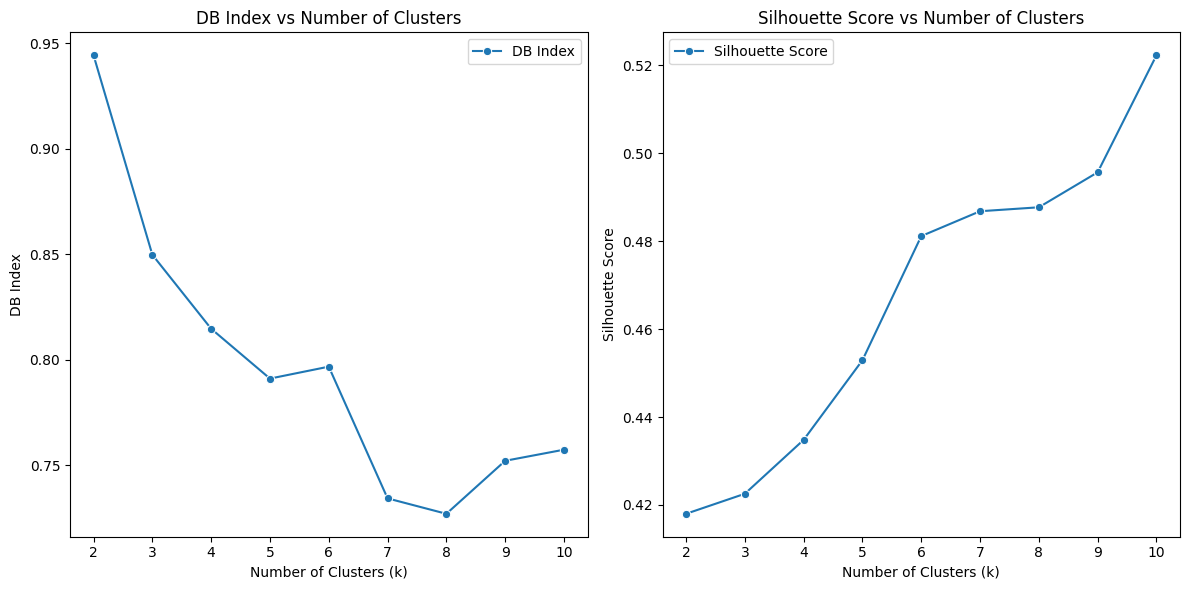

In [43]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.lineplot(x=k_range, y=db_scores, marker="o", label="DB Index")
plt.title("DB Index vs Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("DB Index")
plt.legend()

plt.subplot(1, 2, 2)
sns.lineplot(x=k_range, y=sil_scores, marker="o", label="Silhouette Score")
plt.title("Silhouette Score vs Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.legend()

plt.tight_layout()
plt.show()

**Summary of Clusters**

In [44]:
optimal_k = db_scores.index(min(db_scores)) + 2
print(f"Optimal number of clusters: {optimal_k}")

final_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
final_labels = final_kmeans.fit_predict(scaled_features)

final_db_score = davies_bouldin_score(scaled_features, final_labels)
final_sil_score = silhouette_score(scaled_features, final_labels)

print(f"Final DB Index: {final_db_score:.2f}")
print(f"Final Silhouette Score: {final_sil_score:.2f}")

Optimal number of clusters: 8
Final DB Index: 0.73
Final Silhouette Score: 0.49
